In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("diabetes.csv")

In [185]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [186]:
df.shape

(768, 9)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [188]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [189]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [190]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [191]:
columns = list(df.columns)
for i in columns:
  if i != "Outcome":
    df[i] = df[i].replace(0,np.nan)

In [192]:
df.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [193]:
df2 = df.copy()
for i in columns:
  df[i] = df[i].fillna(df[i].median())
df2 = df2.drop(["Insulin","SkinThickness"],axis = 1)
columns = list(df2.columns)
for i in columns:
  df2[i] = df2[i].fillna(df[i].median())

In [194]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.423177,2.980481,1.000,2.00000,4.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


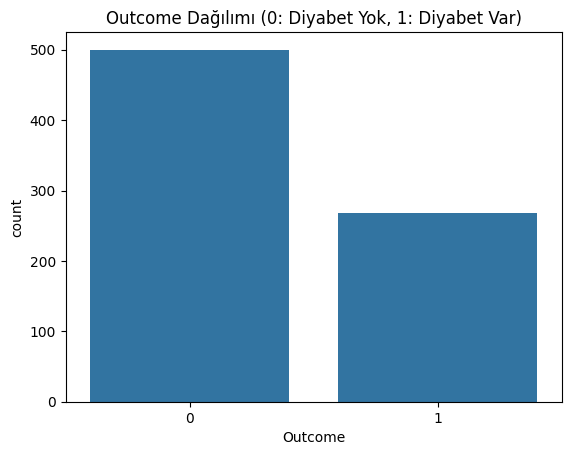

In [195]:
sns.countplot(x="Outcome", data=df)
plt.title("Outcome Dağılımı (0: Diyabet Yok, 1: Diyabet Var)")
plt.show()

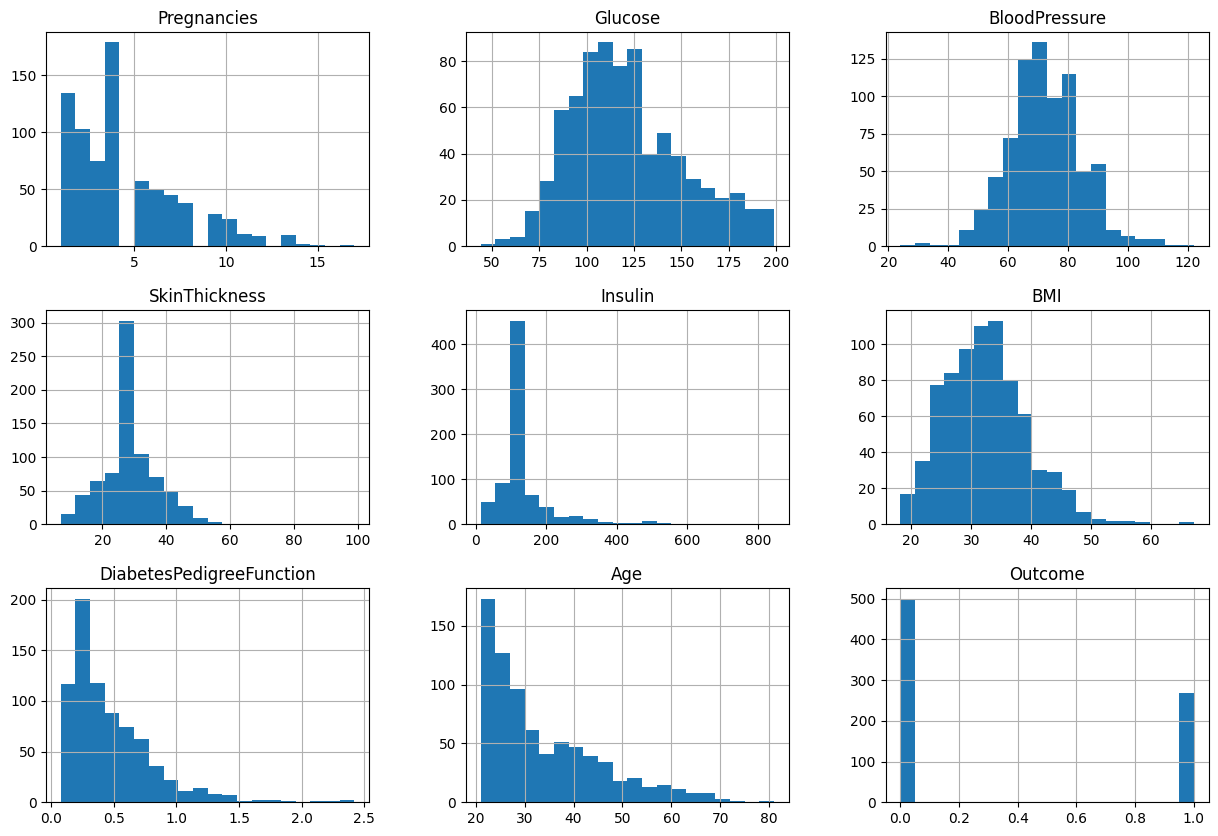

In [196]:
df.hist(bins=20, figsize=(15,10))
plt.show()

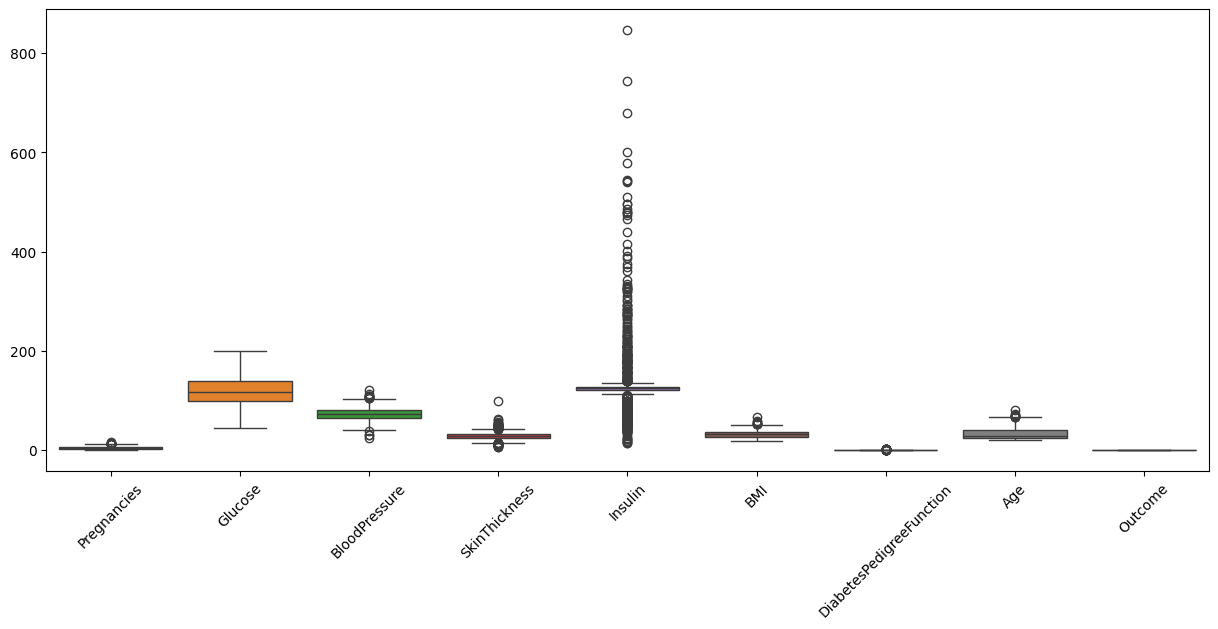

In [197]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


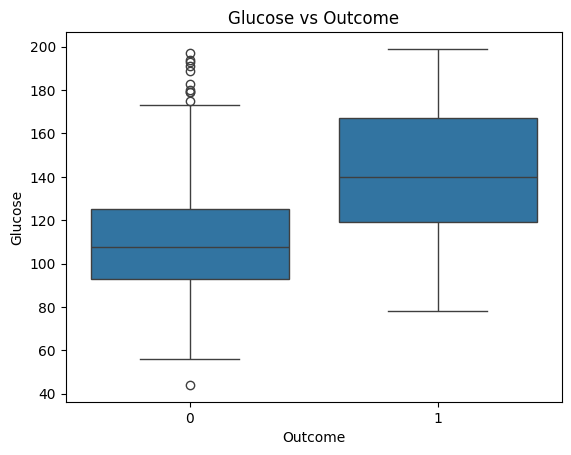

In [198]:
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Glucose vs Outcome")
plt.show()

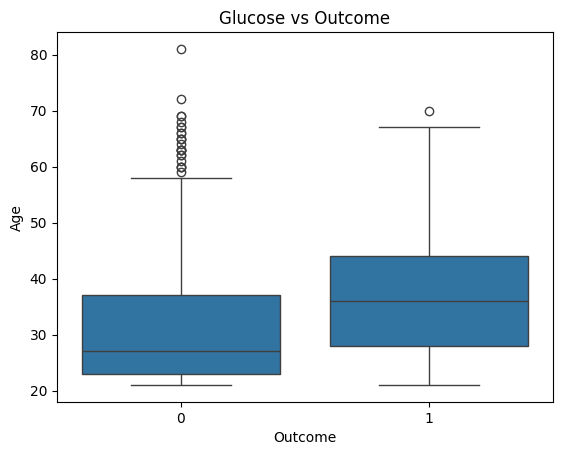

In [199]:
sns.boxplot(x="Outcome", y="Age", data=df)
plt.title("Glucose vs Outcome")
plt.show()


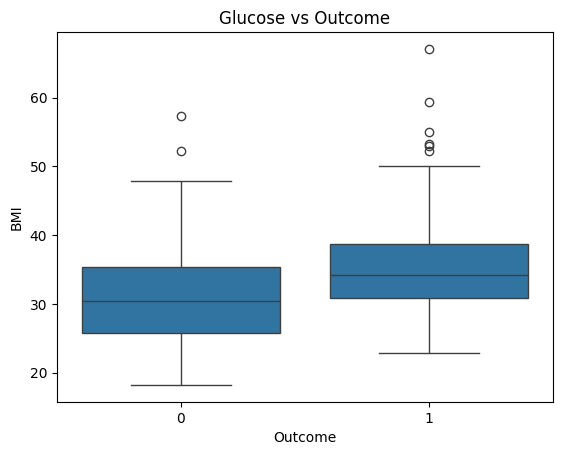

In [200]:
sns.boxplot(x="Outcome", y="BMI", data=df)
plt.title("Glucose vs Outcome")
plt.show()


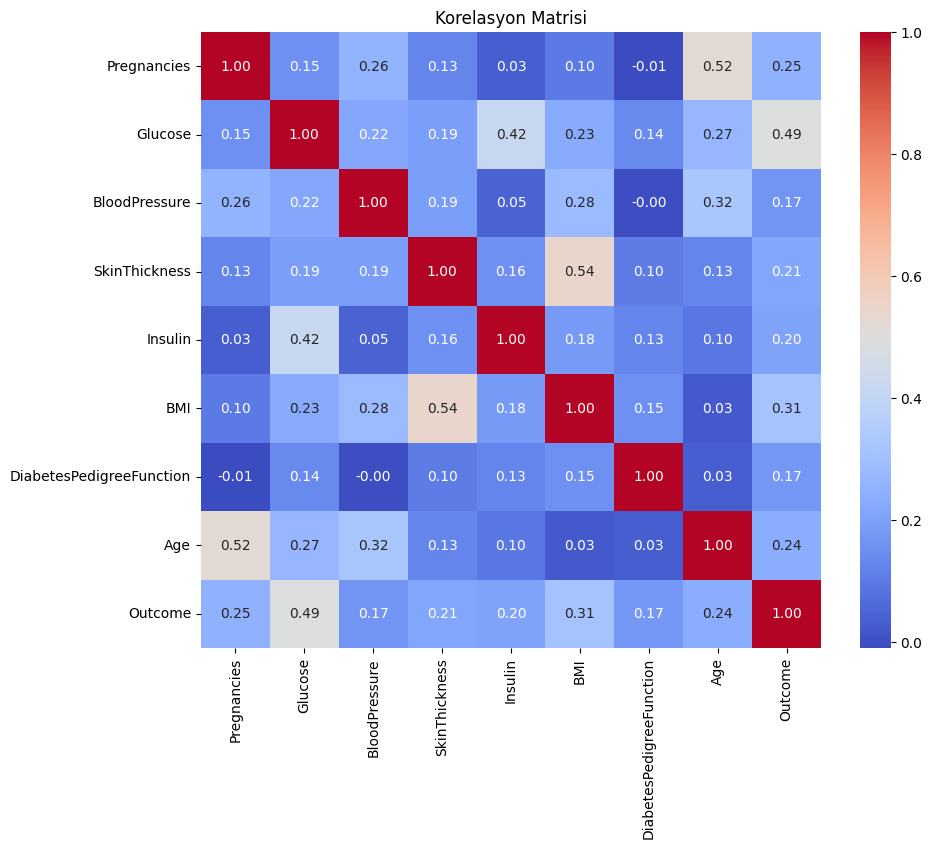

In [201]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()


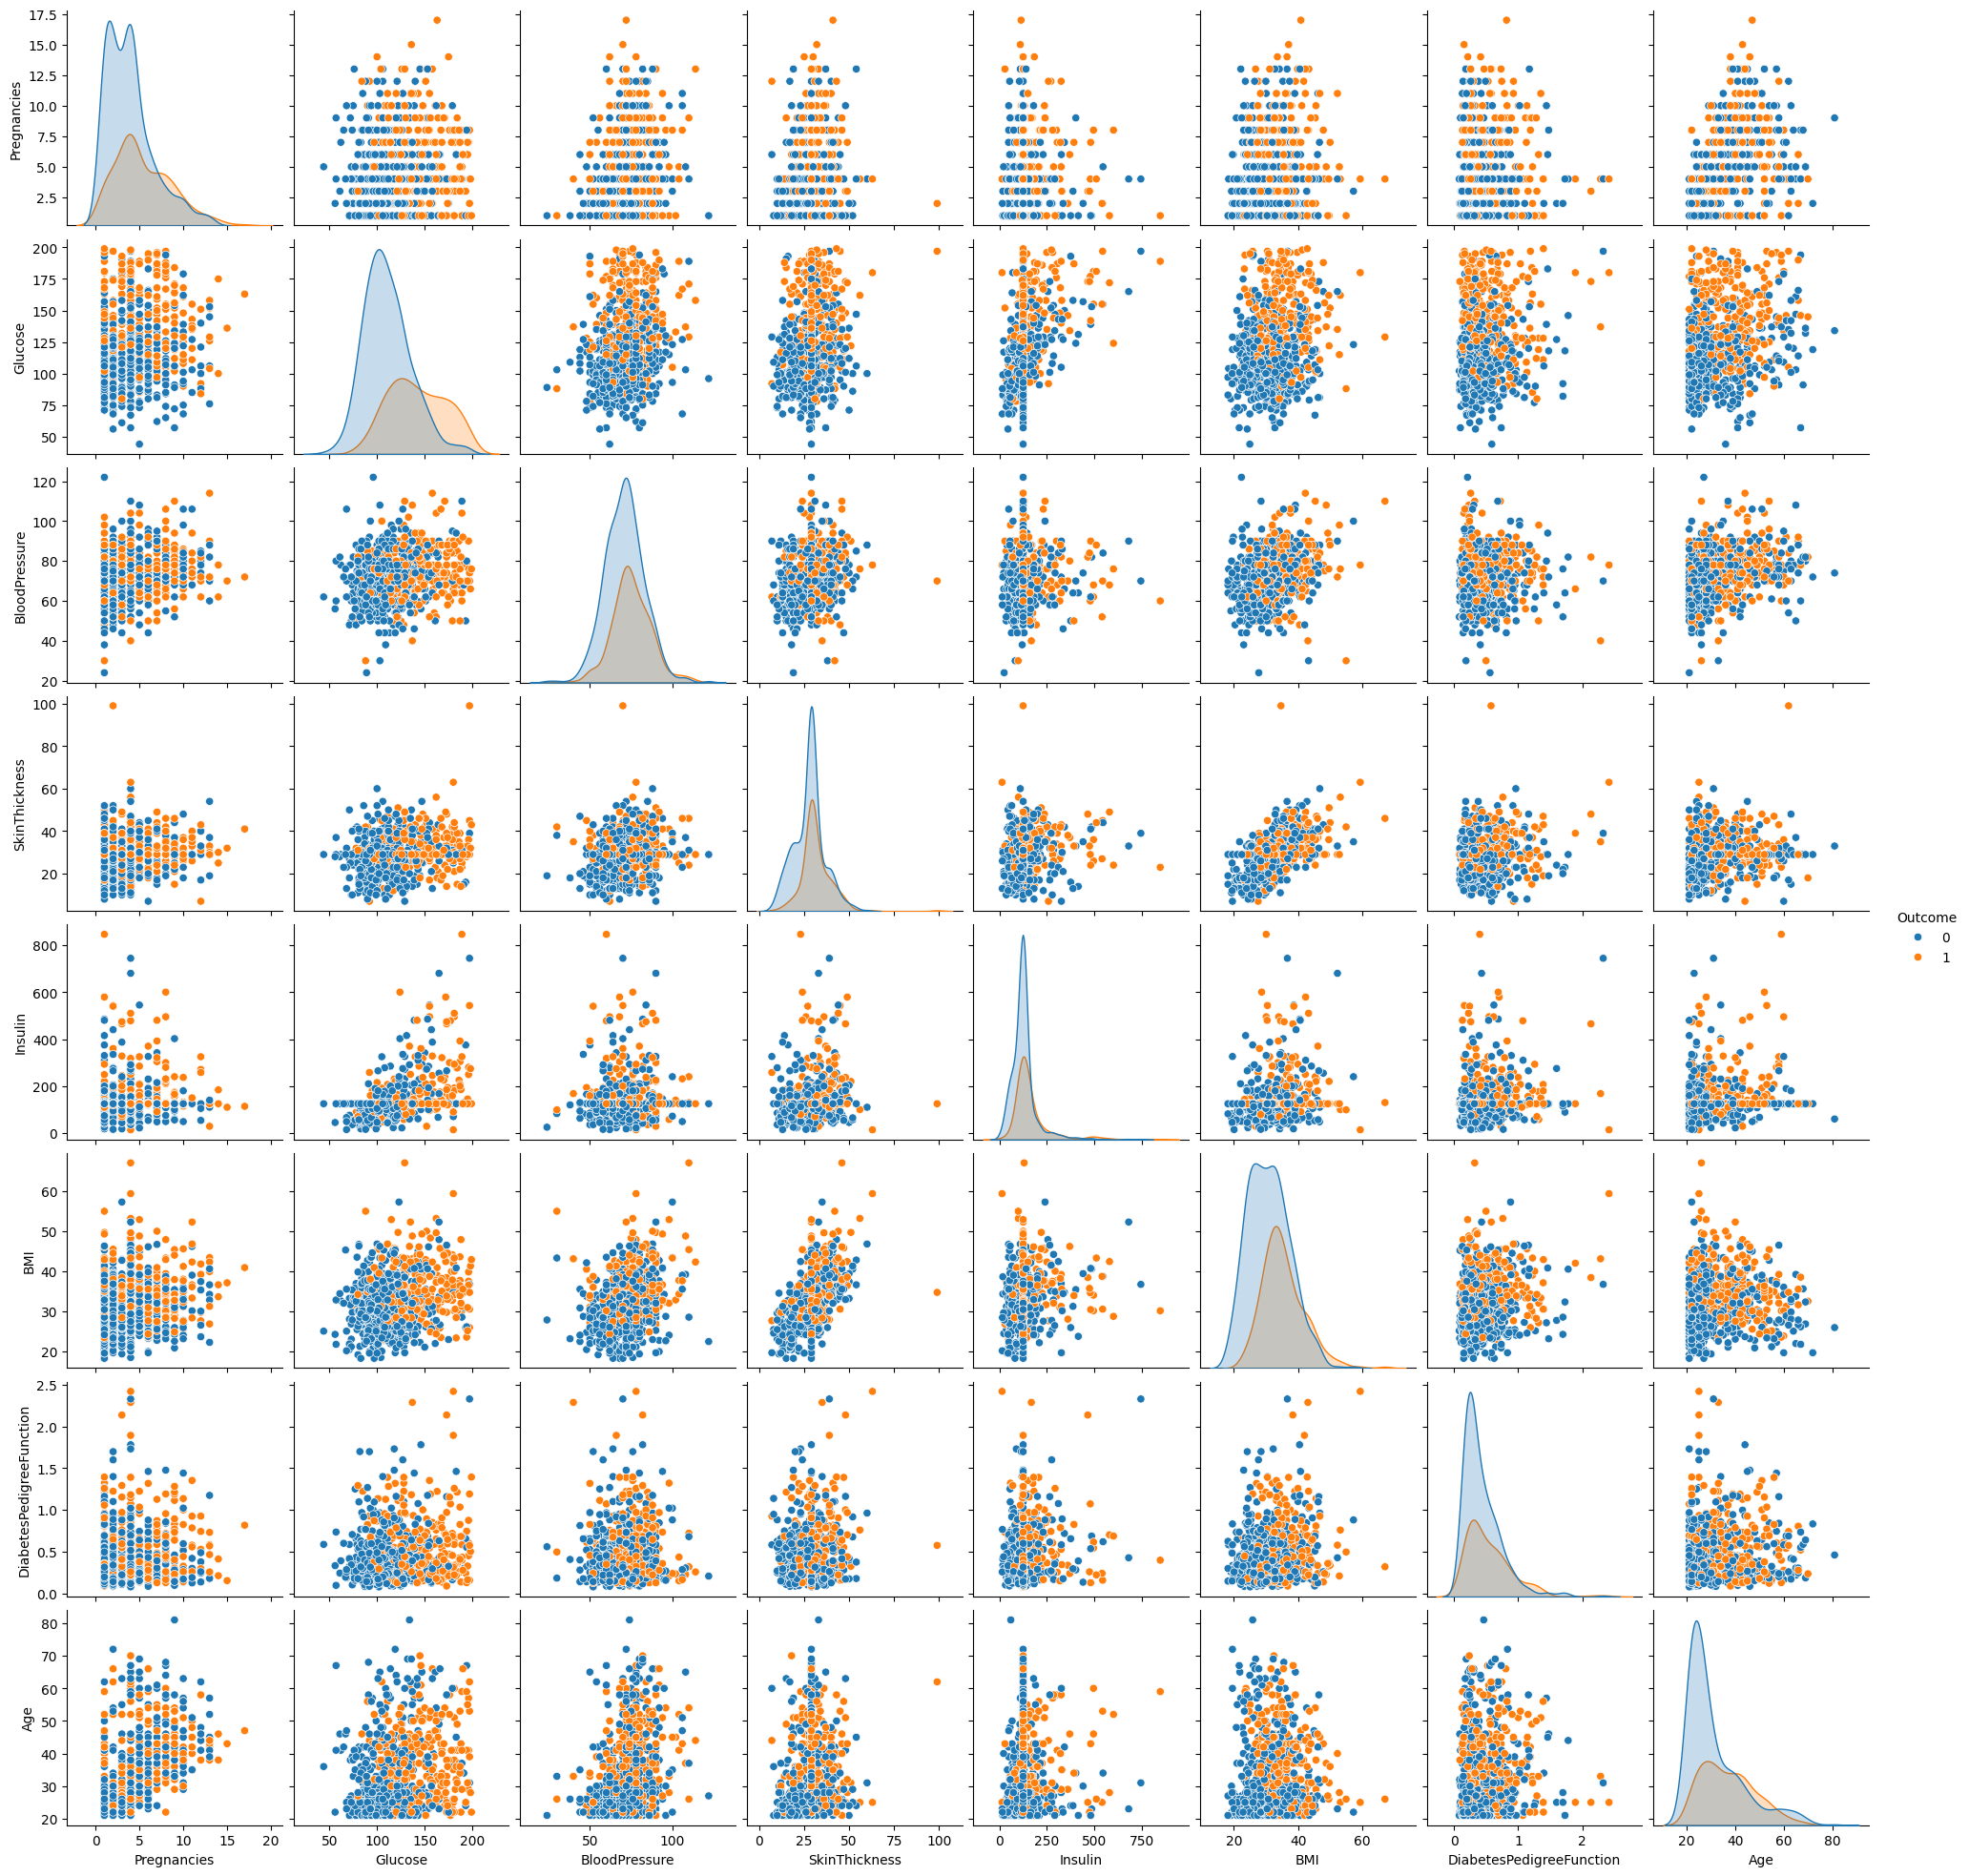

In [202]:
sns.pairplot(df, hue="Outcome")
plt.show()


# ***Machine Learning with data implementing***

In [203]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
results = []

In [204]:
X = df.drop("Outcome",axis = 1)
Y = df["Outcome"]

In [205]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [206]:
def training(Training_model):

  model = Training_model
  model.fit(x_train,y_train)
  y_preds = model.predict(x_test)

  print("Accuracy Score",accuracy_score(y_test,y_preds))
  return model
def hyperparemeter_tuning(model,params):
  grid = training(GridSearchCV(estimator=model,param_grid = params,scoring = "accuracy",cv = 5))
  results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "CV Best Score": round(grid.best_score_, 4),
    })


Logistic Regression

In [207]:
training(LogisticRegression())

Accuracy Score 0.7597402597402597


LogisticRegression()

KNN

In [208]:
training(KNeighborsClassifier())

Accuracy Score 0.7077922077922078


KNeighborsClassifier()

SVM

In [209]:
training(SVC())

Accuracy Score 0.7467532467532467


SVC()

In [210]:
training(AdaBoostClassifier())

Accuracy Score 0.7532467532467533


AdaBoostClassifier()

In [211]:
training(DecisionTreeClassifier())

Accuracy Score 0.7207792207792207


DecisionTreeClassifier()

In [212]:
param_grids = {
    "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"],
        "penalty": ["l2", "none"]
    },
    "SVC": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto", 0.01, 0.001]
    },
    "DecisionTree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 3, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1],
        "algorithm": ["SAMME", "SAMME.R"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"]
    }
}
models = [
    ("LogisticRegression", LogisticRegression(max_iter=500)),
    ("SVC", SVC()),
    ("DecisionTree", DecisionTreeClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("KNN", KNeighborsClassifier())
]


In [213]:
for name, model in models:
   hyperparemeter_tuning(model,param_grids[name])
results_df = pd.DataFrame(results)
print(results_df)

Accuracy Score 0.7597402597402597
Accuracy Score 0.7792207792207793
Accuracy Score 0.7727272727272727
Accuracy Score 0.7727272727272727
Accuracy Score 0.6948051948051948
                Model                                        Best Params  \
0  LogisticRegression  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}   
1                 SVC        {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}   
2        DecisionTree  {'criterion': 'entropy', 'max_depth': 3, 'min_...   
3            AdaBoost  {'algorithm': 'SAMME', 'learning_rate': 1, 'n_...   
4                 KNN  {'metric': 'euclidean', 'n_neighbors': 9, 'wei...   

   CV Best Score  
0         0.7704  
1         0.7720  
2         0.7541  
3         0.7753  
4         0.7687  


Boosting

# ***Machine Learning with deleting data***

In [214]:
X = df2.drop("Outcome",axis = 1)
Y = df2["Outcome"]

In [215]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [216]:
training(LogisticRegression())

Accuracy Score 0.7597402597402597


LogisticRegression()

In [217]:
training(KNeighborsClassifier())

Accuracy Score 0.7142857142857143


KNeighborsClassifier()

In [218]:
training(SVC())

Accuracy Score 0.7792207792207793


SVC()

In [219]:
training(DecisionTreeClassifier())

Accuracy Score 0.7337662337662337


DecisionTreeClassifier()

In [220]:
training(AdaBoostClassifier())

Accuracy Score 0.7532467532467533


AdaBoostClassifier()

In [222]:
results = []
def hyperparemeter_tuning(model,params):
  grid = training(GridSearchCV(estimator=model,param_grid = params,scoring = "accuracy",cv = 5))
  results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "CV Best Score": round(grid.best_score_, 4),
    })
for name, model in models:
   hyperparemeter_tuning(model,param_grids[name])
results_df = pd.DataFrame(results)
print(results_df)


Accuracy Score 0.7727272727272727
Accuracy Score 0.7792207792207793
Accuracy Score 0.7597402597402597
Accuracy Score 0.7792207792207793
Accuracy Score 0.7272727272727273
                Model                                        Best Params  \
0  LogisticRegression     {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}   
1                 SVC        {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}   
2        DecisionTree  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
3            AdaBoost  {'algorithm': 'SAMME', 'learning_rate': 0.1, '...   
4                 KNN  {'metric': 'euclidean', 'n_neighbors': 9, 'wei...   

   CV Best Score  
0         0.7720  
1         0.7736  
2         0.7558  
3         0.7720  
4         0.7720  
